<a href="https://colab.research.google.com/github/marisbotero/ML/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Titanic

1. Leer y explorar los datos
2. Análisis de los datos
3. Visualización de datos
4. Datos de limpieza
5. Elegir el mejor modelo

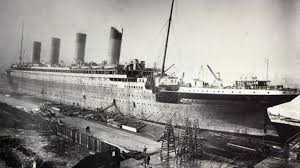

In [0]:
#librerias para limpieza y análisis númerico
import pandas as pd
import numpy as np

In [0]:
df_train = pd.read_csv('train.csv')

In [0]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## *¿Le hacemos preguntas a los datos?*
- ¿El género importa?
- Los que sobreviven que edad tienes?
- Que clase social tienen?

In [0]:
(df["Survived"][df["Sex"]=='male'].value_counts(normalize = True))

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [0]:
(df["Survived"][df["Sex"]=='female'].value_counts(normalize = True))

1    0.742038
0    0.257962
Name: Survived, dtype: float64

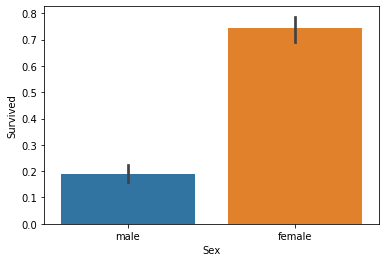

In [0]:
import seaborn as sns
sns.barplot(x="Sex", y="Survived", data=df_train)

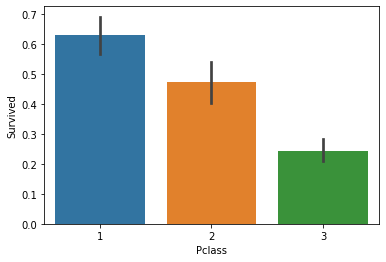

In [0]:
sns.barplot(x="Pclass", y="Survived", data=df_train)

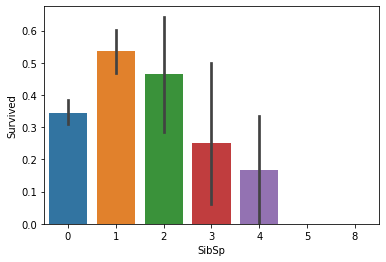

In [0]:
sns.barplot(x="SibSp", y="Survived", data=df_train)

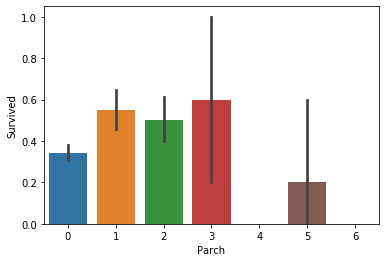

In [0]:
sns.barplot(x="Parch", y="Survived", data=df_train)

- Características numéricas: edad (continua), tarifa (continua), SibSp (discreta), parch (discreta)
- Características categóricas: sobrevivido, sexo, embarcado, clase
- Características alfanuméricas: boleto, cabina

In [0]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df_train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Barkworth, Mr. Algernon Henry Wilson",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [0]:
df_train = df_train.drop(['Cabin'], axis = 1)

In [0]:
df_train = df_train.drop(['Ticket'], axis = 1)

In [0]:
print("Number of people embarking in Southampton (S):")
southampton = df_train[df_train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = df_train[df_train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = df_train[df_train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


## Implementación del Titanic con tensorflow

In [0]:
# importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
import os
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [0]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.', expand=True)

# replacing some titles with more common ones
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr',
           'Don': 'Mr', 'Mme': 'Mrs', 'Jonkheer': 'Mr', 'Lady': 'Mrs',
           'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}
df.replace({'Title': mapping}, inplace=True)

df['Title'].value_counts()

Mr        525
Miss      185
Mrs       128
Master     40
Dr          7
Rev         6
Name: Title, dtype: int64

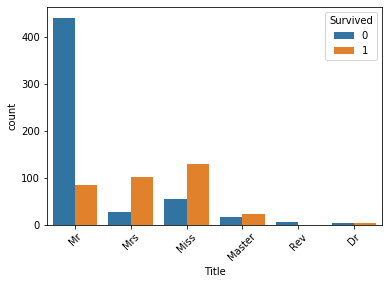

In [0]:
# impute missing Age values using median of Title groups
title_ages = dict(df.groupby('Title')['Age'].median())

# create a column of the average ages
df['age_med'] = df['Title'].apply(lambda x: title_ages[x])

# replace all missing ages with the value in this column
df['Age'].fillna(df['age_med'], inplace=True, )
del df['age_med']

# viz of survival rates of titles

sns.countplot(x='Title', data=df, hue='Survived')
plt.xticks(rotation=45)
plt.show()

In [0]:
# impute missing Fare values using median of Pclass groups
class_fares = dict(df.groupby('Pclass')['Fare'].median())

# create a column of the average fares
df['fare_med'] = df['Pclass'].apply(lambda x: class_fares[x])

# replace all missing fares with the value in this column
df['Fare'].fillna(df['fare_med'], inplace=True, )
del df['fare_med']

In [0]:
df['Embarked'].fillna(method='backfill', inplace=True)

df['Family_Size'] = df['Parch'] + df['SibSp']

In [0]:
train = df[pd.notnull(df['Survived'])]
test = df[pd.isnull(df['Survived'])]

# importing for tensorflow

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from numpy.random import seed

Using TensorFlow backend.


In [0]:
df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

continuous = ['Age', 'Fare', 'Parch', 'Pclass', 'SibSp', 'Family_Size']

scaler = StandardScaler()

for var in continuous:
    df[var] = df[var].astype('float64')
    df[var] = scaler.fit_transform(df[var].values.reshape(-1, 1))
   
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,below18,Title,Family_Size
0,0,0.827377,male,-0.557420,0.432793,-0.473674,-0.502445,S,NaN,Mr,0.059160
1,1,-1.566107,female,0.649410,0.432793,-0.473674,0.786845,C,NaN,Mrs,0.059160
2,1,0.827377,female,-0.255712,-0.474545,-0.473674,-0.488854,S,NaN,Miss,-0.560975
3,1,-1.566107,female,0.423129,0.432793,-0.473674,0.420730,S,NaN,Mrs,0.059160
4,0,0.827377,male,0.423129,-0.474545,-0.473674,-0.486337,S,NaN,Mr,-0.560975


In [0]:

X_train = df[pd.notnull(df['Survived'])].drop(['Survived'], axis=1)
y_train = df[pd.notnull(df['Survived'])]['Survived']
X_test = df[pd.isnull(df['Survived'])].drop(['Survived'], axis=1)

In [0]:
import tensorflow as tf

Sex = tf.feature_column.categorical_column_with_vocabulary_list("Sex", ["female", "male"])
Embarked = tf.feature_column.categorical_column_with_vocabulary_list("Embarked", ["S", "C", "Q"])
Title = tf.feature_column.categorical_column_with_vocabulary_list("Title", ['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'])
Age = tf.feature_column.numeric_column("Age")
Fare = tf.feature_column.numeric_column("Fare")
Parch = tf.feature_column.numeric_column("Parch")
Pclass = tf.feature_column.numeric_column("Pclass")
SibSp = tf.feature_column.numeric_column("SibSp")
Family_Size = tf.feature_column.numeric_column("Family_Size")

feat_cols = [Sex, Embarked, Title, Age, Fare, Parch, Pclass, SibSp, Family_Size]

import tensorflow as tf

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,
                                               y=y_train,
                                               batch_size=100,
                                               num_epochs=None,
                                               shuffle=True)


model = tf.estimator.LinearClassifier(feature_columns = feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpbtw1u49l', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3adc5ace10>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
model.train(input_fn=input_func, max_steps=10000)

pred_fn = tf.estimator.inputs.pandas_input_fn(x=X_val,batch_size=len(X_val),shuffle=False)

predictions = list(model.predict(input_fn=pred_fn))
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])
    
from sklearn.metrics import classification_report
print(classification_report(y_val,final_preds))

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpbtw1u49l/mo